<a href="https://colab.research.google.com/github/driansee/ml-learn/blob/main/ml-pemula/Latihan12_CNNCleanVSMessyRoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Latihan Membuat Model Klasifikasi Gambar**

Tahap awal sebelum kita membangun sebuah model machine learning adalah mendefinisikan problem statement yang ingin kita selesaikan. Pada tahap ini kita menentukan apa masalah yang ingin diselesaikan dan bagaimana implementasi dari model jaringan saraf tiruan dapat menyelesaikan masalah tersebut. Setelah kita memahami masalah, kita dapat mengembangkan model jaringan saraf tiruan sebagai sebuah solusi.

Pada latihan kali ini kita akan membuat sebuah model untuk mengklasifikasi gambar sebuah kamar dan memprediksi apakah kamar tersebut rapi atau berantakan. Pada akhir latihan Anda dapat menguji model yang telah dibuat dengan menggunakan gambar kamar Anda sendiri. Keren, bukan?

**Tahapan Latihan**

Tentunya machine learning selalu membutuhkan data. Pada tahap awal kita perlu memahami dataset yang kita miliki terlebih dahulu. Beberapa hal yang perlu diketahui adalah format dari data, jumlah sampel, dan berapa jumlah label. Selain itu, kita juga perlu memastikan apakah dataset tersebut merupakan data kontinu (masalah regresi) atau data diskrit (masalah klasifikasi).

Dataset yang kita gunakan memiliki 192 sampel data latih yang terdiri dari 96 sampel gambar ruangan rapi dan 96 sampel gambar ruangan berantakan.

Tahapan latihan kali ini adalah:

1. Memastikan TensorFlow yang digunakan di Google Colab adalah versi di atas 2.0
2. Mengunduh dataset dan melakukan extract file dengan metode unzip.
3. Menampung direktori setiap kelas pada direktori train dan validasi ke dalam variabel.
4. Pre-processing data dengan image augmentation.
5. Mempersiapkan data latih yang akan dipelajari oleh model.
6. Membangun arsitektur model dengan Convolutional Neural Network (CNN).
7. Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.
8. Menguji model yang telah dibuat dengan menggunakan gambar yang belum dikenali oleh model.



In [13]:
import tensorflow as tf
import zipfile, os

# Tensorflow version info
print(tf.__version__)

2.15.0


In [14]:
# Mengunduh dataset
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-12-21 03:55:03--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 104.18.13.192, 104.18.12.192, 2606:4700::6812:cc0, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|104.18.13.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   201MB/s    in 0.3s    

2023-12-21 03:55:03 (201 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [15]:
# Melakukan ekstraksi pada file zip
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [16]:
# Menampilkan sub-direktori (‘clean’ gambar ruangan rapi dan ‘messy’ gambar ruangan berantakan)
os.listdir('/tmp/images/train')

['messy', 'clean']

In [17]:
# Menampilkan sub-direktori (‘clean’ gambar ruangan rapi dan ‘messy’ gambar ruangan berantakan)
os.listdir('/tmp/images/val')

['messy', 'clean']

In [18]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Direktori data latih
        target_size=(150, 150),  # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # Karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # Direktori data validasi
        target_size=(150, 150), # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # Karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [22]:
# Compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [23]:
# Latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # Berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25, # Tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # Menampilkan akurasi pengujian data validasi
      validation_steps=5,  # Berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 3s - loss: 1.3489 - accuracy: 0.5600 - val_loss: 0.6838 - val_accuracy: 0.5000 - 3s/epoch - 133ms/step
Epoch 2/25
25/25 - 1s - loss: 0.6976 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000 - 1s/epoch - 49ms/step
Epoch 3/25
25/25 - 1s - loss: 0.6931 - accuracy: 0.5600 - val_loss: 0.6929 - val_accuracy: 0.5000 - 1s/epoch - 53ms/step
Epoch 4/25
25/25 - 2s - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.6764 - val_accuracy: 0.5000 - 2s/epoch - 81ms/step
Epoch 5/25
25/25 - 1s - loss: 0.6802 - accuracy: 0.5500 - val_loss: 0.6706 - val_accuracy: 0.5000 - 1s/epoch - 46ms/step
Epoch 6/25
25/25 - 1s - loss: 0.6825 - accuracy: 0.5800 - val_loss: 0.6977 - val_accuracy: 0.5000 - 1s/epoch - 48ms/step
Epoch 7/25
25/25 - 1s - loss: 0.6831 - accuracy: 0.5200 - val_loss: 0.6677 - val_accuracy: 0.5500 - 1s/epoch - 46ms/step
Epoch 8/25
25/25 - 1s - loss: 0.7147 - accuracy: 0.5400 - val_loss: 0.6931 - val_accuracy: 0.5500 - 1s/epoch - 47ms/step
Epoch 9/25
25/25 - 1s - loss: 0

Saving kamar.jpg to kamar (1).jpg
1/1 [==============================] - 0s 146ms/step

 {'clean': 0, 'messy': 1}
Image:  kamar (1).jpg
Result: clean


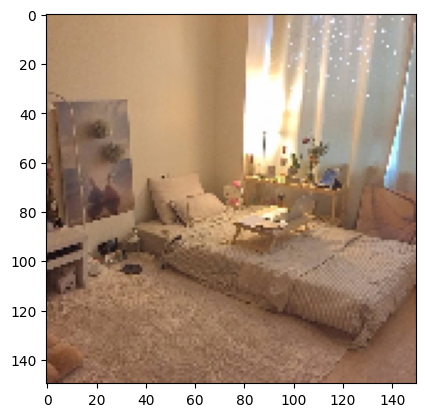

In [24]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting images
  path = fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150))

  imgplot = plt.imshow(img)
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print('\n',train_generator.class_indices)
  print('Image: ',fn)
  print('Result: messy') if classes==1 else print('Result: clean')